In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_single_country

In [2]:
CTRY = 'Singapore'

CONFIRMED__COLNAME = 'total'
ACTIVE__COLNAME = 'active'
DISCHARGED__COLNAME = 'discharged'

LAST_DAYS = 21

In [3]:
# t_S100: Days after 100 cases have surpassed
df_sg = load_single_country(country=CTRY)
t_100cases = df_sg[df_sg.total>100].index.min()
df_sg['t'] = df_sg.index
df_sg['t_s100'] = df_sg['t'].apply(lambda x: x-t_100cases)
df_sg = df_sg[df_sg.t_s100>=0]
_ = df_sg.reset_index(inplace=True, drop=True)

In [4]:
df_sg['total_pct_change'] = df_sg['total'].pct_change()
df_sg['total_pct_change_rolling_mean'] = df_sg['total_pct_change'].rolling(3).mean()
df_sg['0.075'] = 0.075
df_sg[['date', 'total', 'new', 'total_pct_change', 'total_pct_change_rolling_mean', '0.075',]]

,date,total,new,total_pct_change,total_pct_change_rolling_mean,0.075
0,2020-02-29,102,9,NaN,NaN,0.075
1,2020-03-01,106,4,0.039216,NaN,0.075
2,2020-03-02,108,2,0.018868,NaN,0.075
3,2020-03-03,110,2,0.018519,0.025534,0.075
4,2020-03-04,110,0,0.000000,0.012462,0.075
5,2020-03-05,117,7,0.063636,0.027385,0.075
6,2020-03-06,130,13,0.111111,0.058249,0.075
7,2020-03-07,138,8,0.061538,0.078762,0.075
8,2020-03-08,150,12,0.086957,0.086535,0.075
9,2020-03-09,150,0,0.000000,0.049498,0.075


In [5]:
t = np.linspace(0, df_sg['t_s100'].max(),df_sg['t_s100'].max()+1)
pcts = np.linspace(0,10,4+1)
print(pcts)
add_cols = []
for p in pcts:
    t_y = 100 * ((100+p)/100) ** t
    df_sg['predict_{}'.format(p)] = t_y
    add_cols.append('predict_{}'.format(p),)
    
M = df_sg['total_pct_change_rolling_mean'].mean()    
df_sg['M'] =100 * ((100+(M*100))/100) ** t
add_cols.append('M',)
print(add_cols)

[ 0.   2.5  5.   7.5 10. ]
['predict_0.0', 'predict_2.5', 'predict_5.0', 'predict_7.5', 'predict_10.0', 'M']


In [6]:
annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE \nbryan.blacbee', 
    xy=(0.05, 0.01), xycoords='figure fraction', fontsize=10)

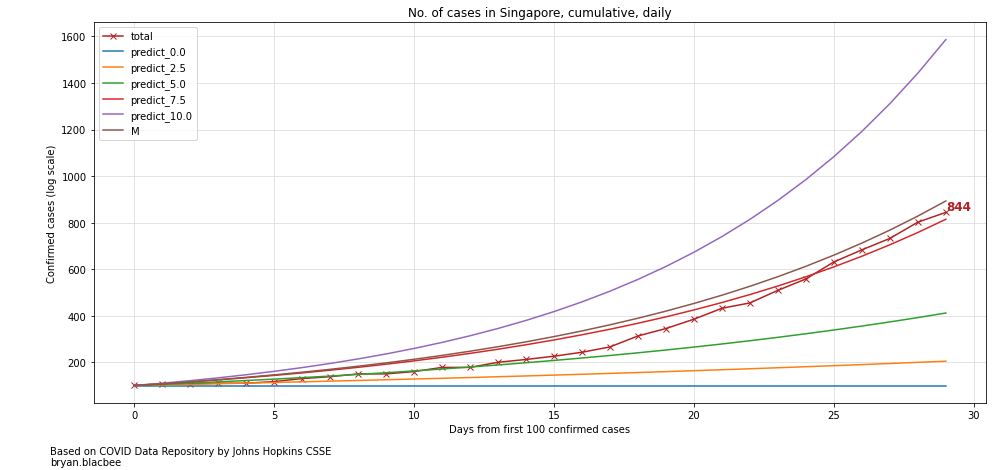

In [7]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='t_s100', y='total', ax=ax, marker='x', color='FIREBRICK')
for a in add_cols:
    df_sg.plot(kind='line', x='t_s100', y=a, ax=ax)
l_cfm = df_sg['total'].tail(1).tolist()
for i, v in enumerate(l_cfm):
    ax.text(df_sg['t_s100'].max(), v+10, str(v), fontsize=12, fontweight='bold', color='FIREBRICK')
    
ax.set(#yscale='log',
       title="No. of cases in {}, cumulative, daily".format(CTRY),
       xlabel='Days from first 100 confirmed cases',
       ylabel='Confirmed cases (log scale)')
ax.grid(color='GAINSBORO')
ax.annotate(**annotate_kwargs)
plt.show()

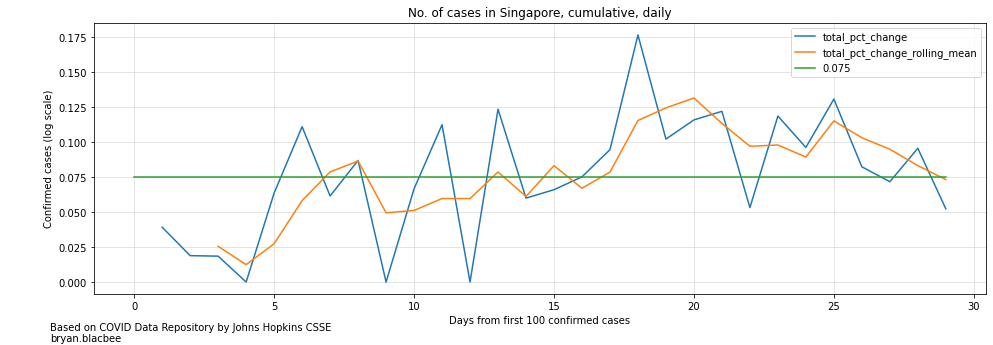

In [8]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='t_s100', y='total_pct_change', ax=ax)
df_sg.plot(kind='line', x='t_s100', y='total_pct_change_rolling_mean', ax=ax)
df_sg.plot(kind='line', x='t_s100', y='0.075', ax=ax)
    
l_cfm = df_sg['total'].tail(1).tolist()
    
ax.set(#yscale='log',
       title="No. of cases in {}, cumulative, daily".format(CTRY),
       xlabel='Days from first 100 confirmed cases',
       ylabel='Confirmed cases (log scale)')
ax.grid(color='GAINSBORO')
ax.annotate(**annotate_kwargs)
plt.show()
